1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd
fp = "open_rank_20236.csv"
data = pd.read_csv(fp)

top100 = data.nlargest(100,'rank')

max_v = top100['value'].max()
min_v = top100['value'].min()
mean_v= top100['value'].mean()
median_v = top100['value'].median()

print(f"Max value: {max_v}")
print(f"Min value: {min_v}")
print(f"Mean value: {mean_v}")
print(f"Median value: {median_v}")

Max value: 1394.45
Min value: 200.68
Mean value: 346.9679
Median value: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [ ]:
import pandas as pd
fp = "activity_2022.csv"
data = pd.read_csv(fp)
#以202212的价值排序，算年增长率
top10 = data.nlargest(10,'202212_value')
top10['growth'] = (top10['202212_value']-top10['20221_value'])/top10['20221_value']
average = top10['growth'].mean()

print(f"Average growth rate: {average:.4f}")

Average growth rate: -0.0474


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [28]:
import pandas as pd

fp1="global_2022.csv"
fp2="china_2022.csv"
global_d =  pd.read_csv(fp1)
china_d = pd.read_csv(fp2)

def calculate_statistics(data): 
    statistics = { 
        'Total Issue Comments': data['issue_comment'].sum(),
        'Total Open Issues': data['open_issue'].sum(), 
        'Total Open Pull Requests': data['open_pull'].sum(), 
        'Total Review Comments': data['review_comment'].sum(), 
        'Total Merged Pull Requests': data['merged_pull'].sum(), 
        'Average Value': data['value'].mean(), 
        'Average Rank': data['rank'].mean(), 
        'Total Rank Delta': data['rankDelta'].sum(), 
        'Total Value Delta': data['valueDelta'].sum() } 
    return statistics

global_s = calculate_statistics(global_d)
china_s = calculate_statistics(china_d)

comparison_df = pd.DataFrame([global_s, china_s], index=['Global', 'China'])
print("\nComparison of Global and China Open Source Top 10:") 
print(comparison_df)


Comparison of Global and China Open Source Top 10:
        Total Issue Comments  Total Open Issues  Total Open Pull Requests  \
Global               3414094             433002                    834230   
China                 612055              91692                    169127   

        Total Review Comments  Total Merged Pull Requests  Average Value  \
Global                1203921                      624720     215855.491   
China                  198575                      137641      40269.534   

        Average Rank  Total Rank Delta  Total Value Delta  
Global           5.5                 1          119069.21  
China            5.5                53           92650.07  


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [24]:
P_A = 0.25 
P_not_A = 0.75  
P_B_given_A = 0.85 
P_B_given_not_A = 0.10  

P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

P_A_given_B = (P_B_given_A * P_A) / P_B


print(f"一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率为: {P_A_given_B:.4f}")


一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率为: 0.7391


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [25]:
P_A = 0.50  # 项目是工具组件型项目
P_not_A = 0.50 
P_B_given_A = 0.35  # 工具组件型项目中由 JavaScript 语言编写的项目占比
P_B_given_not_A = 0.10 

P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)
P_A_given_B = (P_B_given_A * P_A) / P_B

print(f"一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率为: {P_A_given_B:.4f}")


一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率为: 0.7778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

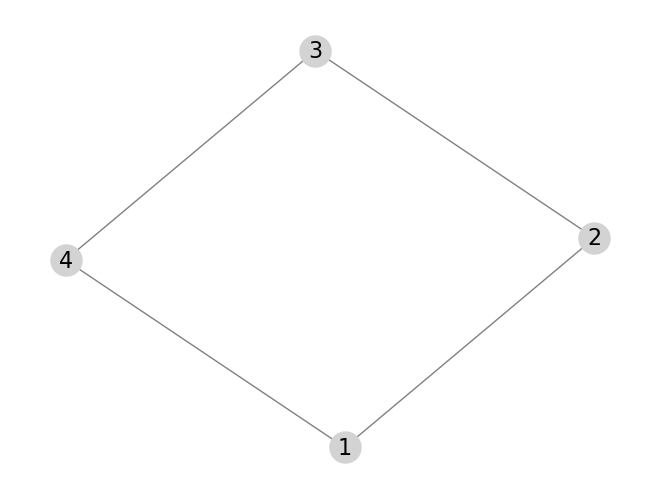

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

nx.draw(G, with_labels=True, node_color='lightgrey', node_size=500, font_size=16, font_color='black', edge_color='gray')
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

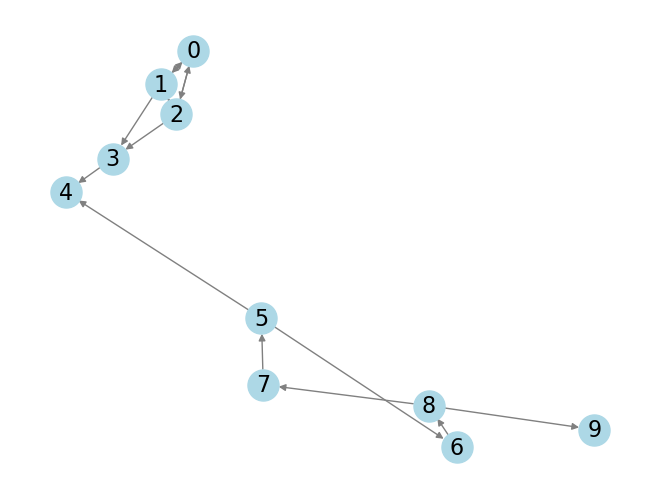

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pos = nx.spring_layout(G)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', edge_color='gray', arrows=True)
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


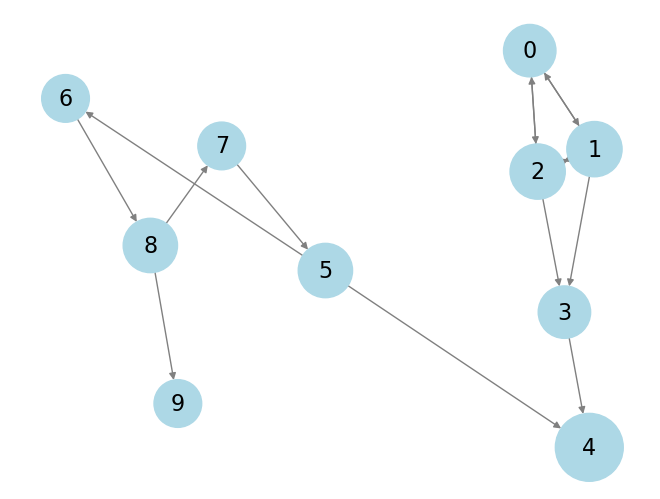

In [9]:
pagerank = nx.pagerank(G)
print("PageRank values:")
for node, rank in pagerank.items():
    print(f"Node {node}: {rank:.4f}")

node_size = [15000 * rank for rank in pagerank.values()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_size, font_size=16, font_color='black', edge_color='gray', arrows=True)
plt.show()


